In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../data/IEEE_2024_positioning_evaluation.csv')

In [17]:
df.head(5)

,image,setup,Trunk-Cam_dist[mm],ObjType,Position,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m]
0,color_1_2_1.png,2D,1531.0,Apple,1,-0.5,1.892,0,-0.517698,1.935668,0.084,0.15,0.096437
1,color_1_2_1.png,2D,1531.0,Apple,2,0.0,1.892,0,0.000000,1.941129,0.081,0.13,0.094340
2,color_1_2_1.png,2D,1531.0,Apple,3,0.5,1.892,0,0.507869,1.920377,0.087,0.13,0.095394
3,color_1_2_1.png,2D,1531.0,Apple,4,-0.5,1.592,0,-0.516606,1.625486,0.081,0.14,0.091652
4,color_1_2_1.png,2D,1531.0,Apple,5,0.0,1.593,0,0.001092,1.624394,0.078,0.11,0.085440


In [18]:
# chunks
# 2D
df_2D = df.loc[df['setup'] == '2D'].copy()
df_2D_apples = df.loc[(df['setup'] == '2D') & (df['ObjType'] == 'Apple')].copy()
df_2D_tennisballs = df.loc[(df['setup'] == '2D') & (df['ObjType'] == 'Tennis_ball')].copy()

# 3d
df_3D = df.loc[df['setup'] == '3D'].copy()
df_3D_apples = df.loc[(df['setup'] == '3D') & (df['ObjType'] == 'Apple')].copy()
df_3D_tennisballs = df.loc[(df['setup'] == '3D') & (df['ObjType'] == 'Tennis_ball')].copy()

In [19]:
df_2D_apples.describe()

,Trunk-Cam_dist[mm],Position,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m]
count,396.000000,396.000000,396.000000,396.000000,396.0,396.000000,396.000000,396.000000,396.000000,396.000000
mean,1532.545455,8.000000,0.000000,1.292144,0.0,-0.003776,1.312699,0.061894,0.093182,0.068728
std,9.853892,4.288932,0.408765,0.423285,0.0,0.418847,0.439420,0.019119,0.033999,0.021799
min,1511.000000,1.000000,-0.500000,0.687000,0.0,-0.527100,0.664855,0.007000,0.020000,0.017321
25%,1528.000000,4.000000,-0.500000,0.990000,0.0,-0.514660,0.988662,0.047000,0.070000,0.050990
50%,1535.000000,8.000000,0.000000,1.292000,0.0,-0.001090,1.314630,0.061000,0.090000,0.070000
75%,1538.000000,12.000000,0.500000,1.593000,0.0,0.504345,1.632337,0.076000,0.120000,0.083066
max,1549.000000,15.000000,0.500000,1.898000,0.0,0.517018,1.969564,0.112000,0.190000,0.122474


In [20]:
for df_chunk in [df_2D, df_2D_apples, df_2D_tennisballs, 
                 df_3D, df_3D_apples, df_3D_tennisballs]:
    
    rmse_manhattan = np.sqrt(np.sum(df_chunk['Manhattan[m]'] ** 2) / df_chunk['Manhattan[m]'].count())
    rmse_euclidean = np.sqrt(np.sum(df_chunk['Euclidean[m]'] ** 2) / df_chunk['Euclidean[m]'].count())

    print(rmse_manhattan, rmse_euclidean)

0.09979608839658624 0.07246795801091403
0.09917589720218607 0.07209351390711055
0.12405196043952266 0.08736894948054102
0.3534435362732403 0.2511022368146754
0.32750027715296626 0.23507039644818536
0.4439403685715658 0.3080419297895574


In [21]:
# Define the list of dataframes
dataframes = {
    '2D': df_2D,
    '2D_apples': df_2D_apples,
    '2D_TB': df_2D_tennisballs,
    '3D': df_3D,
    '3D_apples': df_3D_apples,
    '3D_TB': df_3D_tennisballs
}

# Initialize a list to store the results
results = []

# Iterate through the dataframes and calculate RMSE values
for name, df_chunk in dataframes.items():
    rmse_manhattan = np.sqrt(np.sum(df_chunk['Manhattan[m]'] ** 2) / df_chunk['Manhattan[m]'].count())
    rmse_euclidean = np.sqrt(np.sum(df_chunk['Euclidean[m]'] ** 2) / df_chunk['Euclidean[m]'].count())

    results.append([name, rmse_manhattan, rmse_euclidean])

# Create a DataFrame from the results
rmse_df = pd.DataFrame(results, columns=['DataFrame', 'RMSE_Manhattan', 'RMSE_Euclidean'])

# Print the resulting DataFrame
print(np.round(rmse_df, 2))


   DataFrame  RMSE_Manhattan  RMSE_Euclidean
0         2D            0.10            0.07
1  2D_apples            0.10            0.07
2      2D_TB            0.12            0.09
3         3D            0.35            0.25
4  3D_apples            0.33            0.24
5      3D_TB            0.44            0.31


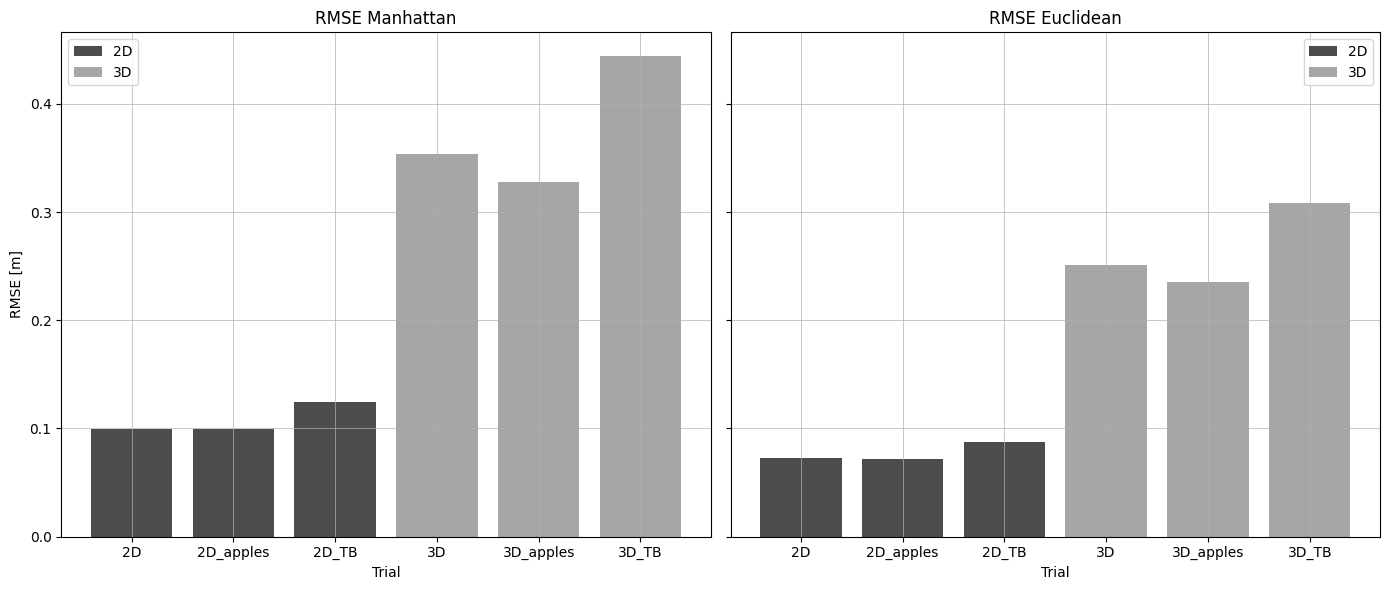

In [23]:
# Add a new column to differentiate between 2D and 3D
rmse_df['Dimension'] = rmse_df['DataFrame'].apply(lambda x: '2D' if '2D' in x else '3D')
rmse_df['Object'] = rmse_df['DataFrame'].apply(lambda x: 'apple' if 'apples' in x else 'TB')

# Plot the histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].grid(lw=.5)
# Histogram for RMSE_Manhattan
for dimension, color in zip(['2D', '3D'], ['k', 'gray']):
    subset = rmse_df[rmse_df['Dimension'] == dimension]
    axes[0].bar(subset['DataFrame'], subset['RMSE_Manhattan'], color=color, label=dimension, alpha=0.7)

axes[0].set_title('RMSE Manhattan')
axes[0].set_xlabel('Trial')
axes[0].set_ylabel('RMSE [m]')
axes[0].legend()


axes[1].grid(lw=.5)
# Histogram for RMSE_Euclidean
for dimension, color in zip(['2D', '3D'], ['k', 'gray']):
    subset = rmse_df[rmse_df['Dimension'] == dimension]
    axes[1].bar(subset['DataFrame'], subset['RMSE_Euclidean'], color=color, label=dimension, alpha=0.7)


axes[1].set_title('RMSE Euclidean')
axes[1].set_xlabel('Trial')
axes[1].legend()


plt.tight_layout()

plt.savefig('../docs/images/results.png', dpi=400)
plt.show()


In [24]:
grouped_df = rmse_df.iloc[:, 1:-1].groupby('Dimension').mean()
grouped_df

,RMSE_Manhattan,RMSE_Euclidean
Dimension,,
2D,0.107675,0.077310
3D,0.374961,0.264738


In [25]:
rmse_df

,DataFrame,RMSE_Manhattan,RMSE_Euclidean,Dimension,Object
0,2D,0.099796,0.072468,2D,TB
1,2D_apples,0.099176,0.072094,2D,apple
2,2D_TB,0.124052,0.087369,2D,TB
3,3D,0.353444,0.251102,3D,TB
4,3D_apples,0.327500,0.235070,3D,apple
5,3D_TB,0.443940,0.308042,3D,TB


In [26]:
grouped_df = rmse_df.iloc[:, 1:].groupby(['Object', 'Dimension']).mean()
grouped_df

RMSE_Manhattan  RMSE_Euclidean
Object Dimension                                
TB     2D               0.111924        0.079918
       3D               0.398692        0.279572
apple  2D               0.099176        0.072094
       3D               0.327500        0.235070

errore per posizione

In [33]:
grouped_df = df.groupby('Position').sum().loc[:, ['Manhattan[m]',	'Euclidean[m]']]

grouped_df['CumError'] =  grouped_df['Manhattan[m]'] + grouped_df['Euclidean[m]']
grouped_df

,Manhattan[m],Euclidean[m],CumError
Position,,,
1,5.53,3.619574,9.149574
2,5.24,3.816423,9.056423
3,5.08,3.687461,8.767461
4,5.00,3.287833,8.287833
5,4.48,3.265665,7.745665
6,4.77,3.311040,8.081040
7,4.17,2.669372,6.839372
8,3.22,2.525605,5.745605
9,3.23,2.329933,5.559933


<BarContainer object of 25 artists>

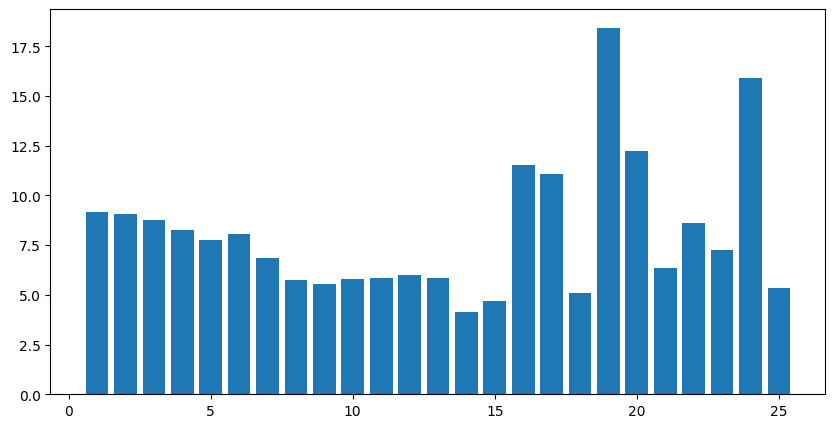

In [35]:
plt.figure(figsize=(10, 5))

plt.bar(grouped_df.index, grouped_df['CumError'] )


<Figure size 1000x500 with 0 Axes>

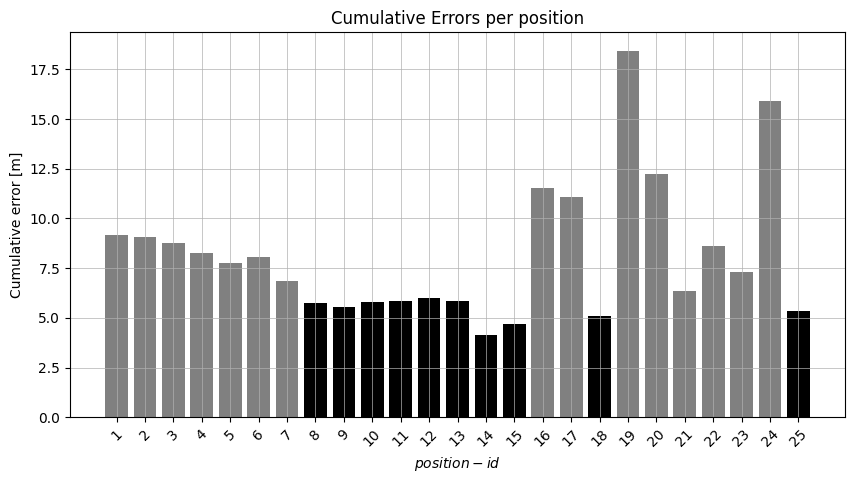

In [58]:
plt.figure(figsize=(10, 5))

# Find the 10 lowest CumErrors
lowest_cumerrors = grouped_df.nsmallest(10, 'CumError')

# Create a color array
colors = ['k' if index in lowest_cumerrors.index else 'grey' for index in grouped_df.index]

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.grid(lw=.5)
plt.bar(grouped_df.index -1, grouped_df['CumError'], color=colors)

plt.xlabel('$position-id$')
plt.ylabel('Cumulative error [m]')
plt.title('Cumulative Errors per position')

# Set ticks to each group
plt.xticks(ticks=np.arange(len(grouped_df.index)), labels=grouped_df.index)

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../docs/images/position_cum_error.png', dpi=400)

plt.show()
